# Weather Forecasting using Python

Weather forecasting is the task of forecasting weather conditions for a given location and time. With the use of weather data and algorithms, it is possible to predict weather conditions for the next n number of days.

For forecasting weather using Python, we need a dataset containing historical weather data based on a particular location. I found a dataset on Kaggle based on the Daily weather data of New Delhi.

Now let’s start this task by importing the necessary Python libraries and the dataset we need:

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data_train=pd.read_csv("DailyDelhiClimateTrain.csv")
data_train.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [4]:
data_train.tail()

date   meantemp    humidity  wind_speed  meanpressure
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

Let’s have a look at the descriptive statistics of this data before moving forward:

In [5]:
data_train.describe()

meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

Now let’s have a look at the information about all the columns in the dataset:

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [7]:
data_test=pd.read_csv("DailyDelhiClimateTest.csv")
data_test.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

In [8]:
data_test.tail()

date  meantemp   humidity  wind_speed  meanpressure
109  2017-04-20    34.500  27.500000    5.562500    998.625000
110  2017-04-21    34.250  39.375000    6.962500    999.875000
111  2017-04-22    32.900  40.900000    8.890000   1001.600000
112  2017-04-23    32.875  27.500000    9.962500   1002.125000
113  2017-04-24    32.000  27.142857   12.157143   1004.142857

In [9]:
data_test.describe()

meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524

In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


The date column in this dataset is not having a datetime data type. We will change it when required. Let’s have a look at the mean temperature in Delhi over the years:

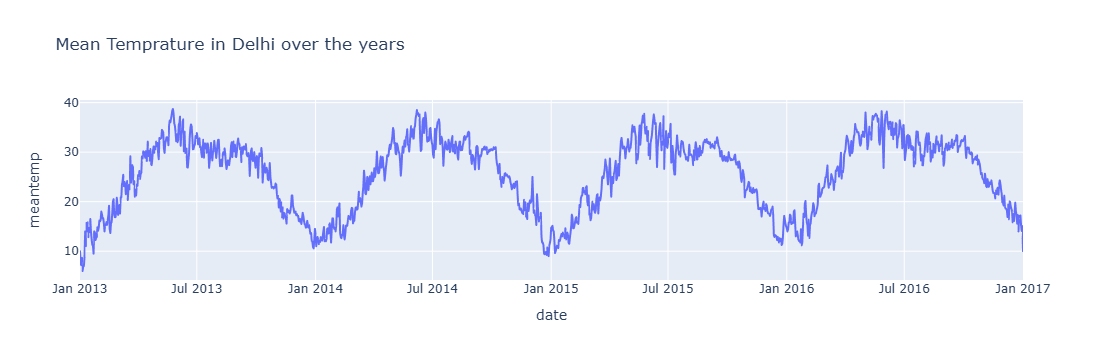

In [11]:
figure=px.line(data_train, x="date", y="meantemp", title="Mean Temprature in Delhi over the years")
figure.show()

Now let’s have a look at the humidity in Delhi over the years:

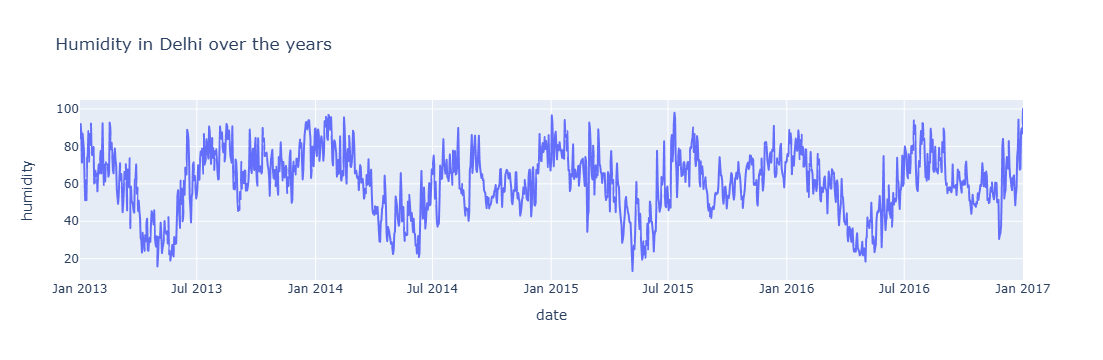

In [12]:
figure=px.line(data_train, x="date", y="humidity", title="Humidity in Delhi over the years")
figure.show()

Now let’s have a look at the wind speed in Delhi over the years:

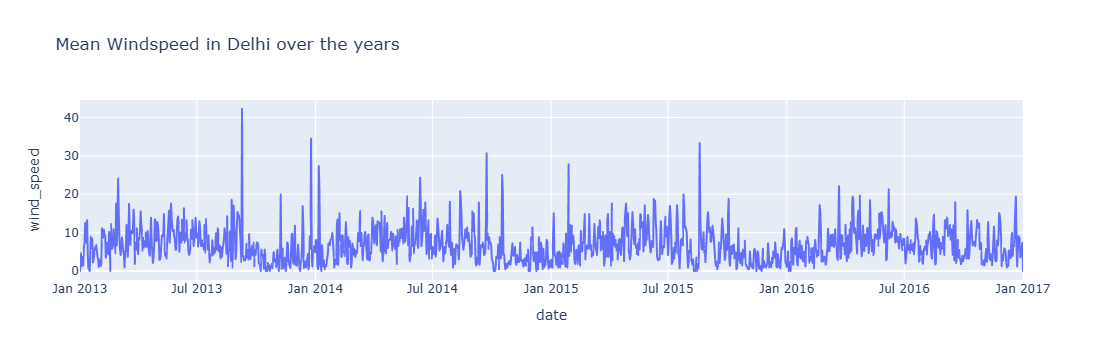

In [13]:
figure=px.line(data_train, x="date", y="wind_speed", title="Mean Windspeed in Delhi over the years")
figure.show()

Till 2015, the wind speed was higher during monsoons (August & September) and retreating monsoons (December & January). After 2015, there were no anomalies in wind speed during monsoons. Now let’s have a look at the relationship between temperature and humidity:

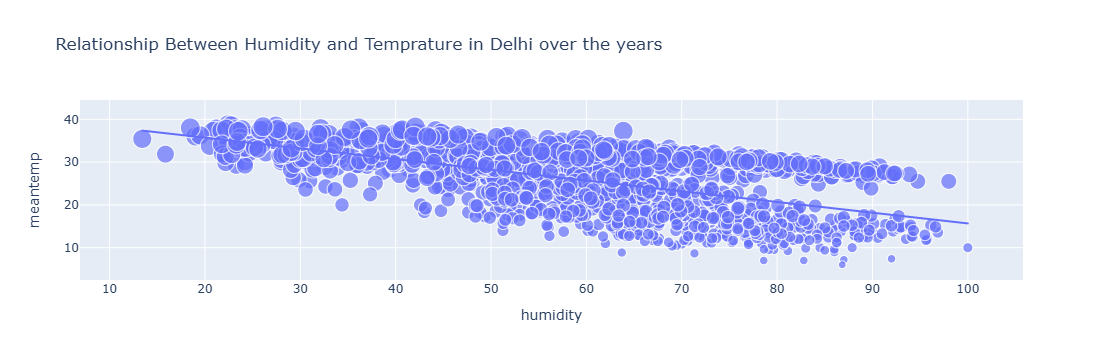

In [14]:
figure=px.scatter(data_train, x="humidity", y="meantemp", size="meantemp", trendline="ols", title="Relationship Between Humidity and Temprature in Delhi over the years")
figure.show()

There’s a negative correlation between temperature and humidity in Delhi. It means higher temperature results in low humidity and lower temperature results in high humidity.

## Analyzing Temperature Change

Now let’s analyze the temperature change in Delhi over the years. For this task, I will first convert the data type of the date column into datetime. Then I will add two new columns in the dataset for year and month values.

Here’s how we can change the data type and extract year and month data from the date column:

In [15]:
data_train["date"] = pd.to_datetime(data_train["date"], errors='coerce')

# Drop rows where the conversion failed
data_train = data_train.dropna(subset=["date"])

# Extract year and month
data_train["year"] = data_train["date"].dt.year
data_train["month"] = data_train["date"].dt.month

data_train.head()

date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1

In [27]:
data_test["date"] = pd.to_datetime(data_test["date"], errors='coerce')

# Drop rows where the conversion failed
data_test = data_test.dropna(subset=["date"])

# Extract year and month
data_test["year"] = data_test["date"].dt.year
data_test["month"] = data_test["date"].dt.month

data_test.head()

date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
1 2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2 2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
3 2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
4 2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1

Now let’s have a look at the temperature change in Delhi over the years:

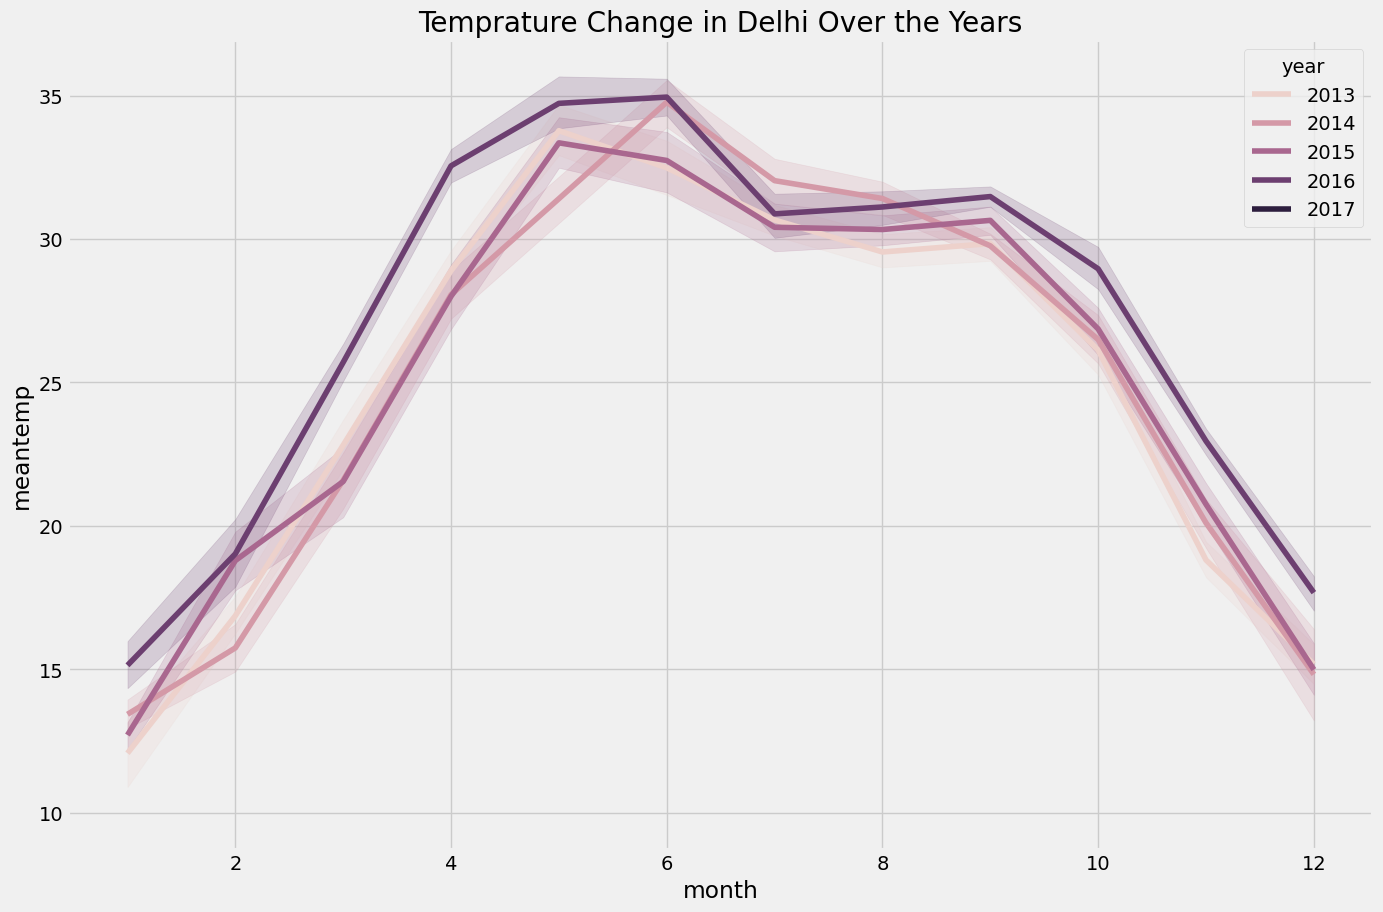

In [28]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))
plt.title("Temprature Change in Delhi Over the Years")
sns.lineplot(data_train, x="month", y="meantemp", hue="year")
plt.show()

Although 2017 was not the hottest year in the summer, we can see a rise in the average temperature of Delhi every year.

## Forecasting Weather using Python
Now let’s move to the task of weather forecasting. I will be using the Facebook prophet model for this task. The Facebook prophet model is one of the best techniques for time series forecasting. If you have never used this model before, you can install it on your system by using the command mentioned below in your command prompt or terminal:

pip install prophet
The prophet model accepts time data named as “ds”, and labels as “y”. So let’s convert the data into this format:

In [29]:
forecast_data=data_train.rename(columns={"date":"ds", "meantemp":"y"})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


Now below is how we can use the Facebook prophet model for weather forecasting using Python:

16:22:01 - cmdstanpy - INFO - Chain [1] start processing
16:22:01 - cmdstanpy - INFO - Chain [1] done processing


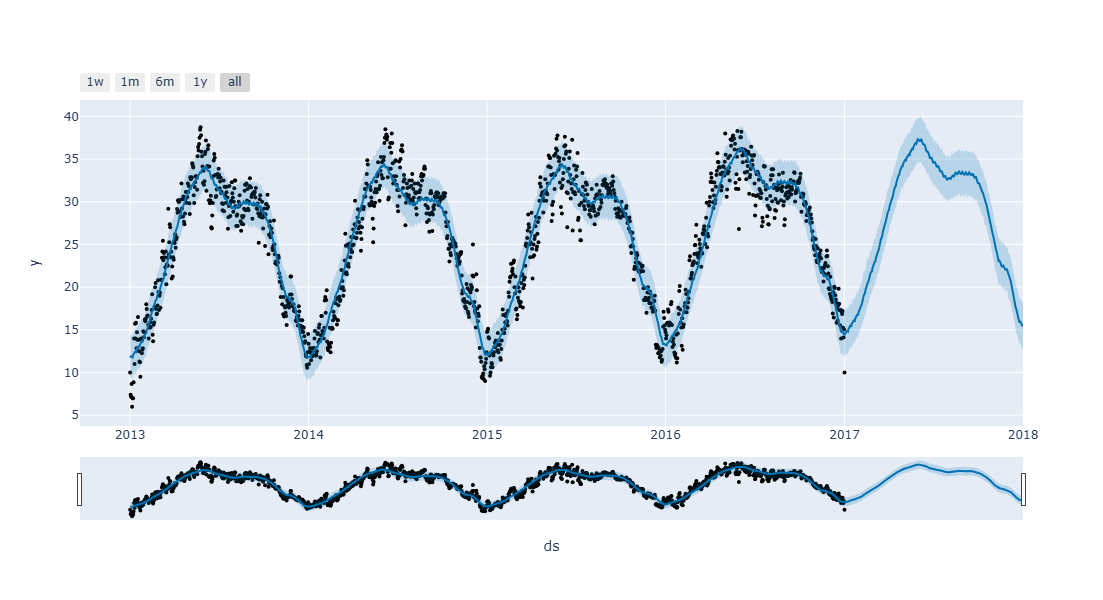

In [30]:
model=Prophet()
model.fit(forecast_data)
forecasts=model.make_future_dataframe(periods=365)
predictions=model.predict(forecasts)
plot_plotly(model, predictions)

So this is how you can analyze and forecast the weather using Python.

In [54]:
print(predictions)

             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2013-01-01  24.689997    9.365167   14.239970    24.689997    24.689997   
1    2013-01-02  24.690142    9.303224   14.504609    24.690142    24.690142   
2    2013-01-03  24.690287    9.595926   14.387588    24.690287    24.690287   
3    2013-01-04  24.690432    9.361403   14.315510    24.690432    24.690432   
4    2013-01-05  24.690577    9.249527   14.437693    24.690577    24.690577   
...         ...        ...         ...         ...          ...          ...   
1822 2017-12-28  28.583674   13.096416   18.497019    27.996620    29.193376   
1823 2017-12-29  28.586590   12.918560   18.221622    27.997260    29.200273   
1824 2017-12-30  28.589506   12.775710   18.578787    27.997901    29.207082   
1825 2017-12-31  28.592422   12.621592   18.108997    27.998541    29.213447   
1826 2018-01-01  28.595337   12.970978   18.402764    27.996551    29.218468   

      additive_terms  additive_terms_lo

### Setting date col as an index

In [31]:
date_train_date=data_train["date"]
date_train_date.head()

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: date, dtype: datetime64[ns]

In [32]:
date_test_date=data_test["date"]
date_test_date.head()

0   2017-01-01
1   2017-01-02
2   2017-01-03
3   2017-01-04
4   2017-01-05
Name: date, dtype: datetime64[ns]

In [33]:
data_train_date=data_train.set_index("date")

In [34]:
data_train_date.sample()

meantemp  humidity  wind_speed  meanpressure  year  month
date                                                                 
2015-08-22     30.25    65.375         5.8      1000.875  2015      8

In [35]:
data_test_date=data_test.set_index("date")
data_test_date.sample()

meantemp  humidity  wind_speed  meanpressure  year  month
date                                                                 
2017-02-07    15.125     63.75      7.6375      1016.125  2017      2

### Getting Year ,Month ,Day_name from the date

In [36]:
data_train_date["day_name"]=data_train_date.index.strftime("%A")
data_train_date

meantemp    humidity  wind_speed  meanpressure  year  month  \
date                                                                       
2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1   
2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1   
2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1   
2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1   
2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1   
...               ...         ...         ...           ...   ...    ...   
2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12   
2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12   
2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12   
2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12   
2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1   

             day_name  
date                   
2013-01-01    Tuesday  
2013-01-02  Wednesday  
2013-01-03   Thursday  
2013-01-04     Friday  
2013-01-05   Saturday  
...               ...  
2016-12-28  Wednesday  
2016-12-29   Thursday  
2016-12-30     Friday  
2016-12-31   Saturday  
2017-01-01     Sunday  

[1462 rows x 7 columns]

In [25]:
data_test_date.head()

meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333

In [40]:
data_test_date['year'] = data_test_date.index.year
data_test_date['month'] = data_test_date.index.month

In [42]:
data_test_date["day_name"]=data_test_date.index.strftime("%A")
data_test_date.head()

meantemp   humidity  wind_speed  meanpressure  year  month  \
date                                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1   
2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1   
2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1   
2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1   
2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1   

             day_name  
date                   
2017-01-01     Sunday  
2017-01-02     Monday  
2017-01-03    Tuesday  
2017-01-04  Wednesday  
2017-01-05   Thursday

### Getting all data for a specific year

In [43]:
data_train_date.loc['2015']

meantemp  humidity  wind_speed  meanpressure  year  month  \
date                                                                    
2015-01-01    14.750    72.000      0.9250      1017.500  2015      1   
2015-01-02    14.875    96.625      3.0125      1017.875  2015      1   
2015-01-03    15.125    92.000      0.9250      1017.375  2015      1   
2015-01-04    14.125    78.750      9.5125      1019.625  2015      1   
2015-01-05    14.000    69.375     15.0500      1016.000  2015      1   
...              ...       ...         ...           ...   ...    ...   
2015-12-27    15.375    63.250      7.8875      1020.625  2015     12   
2015-12-28    17.125    58.125     10.8875      1020.875  2015     12   
2015-12-29    16.375    65.000      7.4125      1018.125  2015     12   
2015-12-30    15.500    71.750      2.1000      1017.500  2015     12   
2015-12-31    15.000    71.375      2.0875      1020.500  2015     12   

             day_name  
date                   
2015-01-01   Thursday  
2015-01-02     Friday  
2015-01-03   Saturday  
2015-01-04     Sunday  
2015-01-05     Monday  
...               ...  
2015-12-27     Sunday  
2015-12-28     Monday  
2015-12-29    Tuesday  
2015-12-30  Wednesday  
2015-12-31   Thursday  

[365 rows x 7 columns]

### Getting data for a Specific Period

In [44]:
data_train_date.loc['2014-01-01':'2014-02-01']

meantemp   humidity  wind_speed  meanpressure  year  month  \
date                                                                      
2014-01-01  13.375000  89.625000    7.650000   1021.000000  2014      1   
2014-01-02  11.000000  78.375000    8.100000   1020.250000  2014      1   
2014-01-03  12.500000  74.875000    5.325000   1017.750000  2014      1   
2014-01-04  12.875000  88.125000    1.162500   1016.250000  2014      1   
2014-01-05  12.375000  89.000000    0.462500   1014.500000  2014      1   
2014-01-06  11.428571  86.285714   27.337500   1017.625000  2014      1   
2014-01-07  12.142857  72.285714   20.600000   1017.750000  2014      1   
2014-01-08  11.875000  76.875000    1.850000   1017.875000  2014      1   
2014-01-09  12.833333  83.000000    1.233333   1017.000000  2014      1   
2014-01-10  12.375000  85.375000    0.000000   1016.625000  2014      1   
2014-01-11  12.125000  82.625000    6.725000   1019.625000  2014      1   
2014-01-12  12.875000  80.875000    3.250000   1020.750000  2014      1   
2014-01-13  14.000000  72.375000    1.162500   1019.375000  2014      1   
2014-01-14  14.875000  76.750000    2.787500   1017.000000  2014      1   
2014-01-15  12.000000  93.500000    0.462500   1019.750000  2014      1   
2014-01-16  12.285714  90.571429    1.585714   1019.571429  2014      1   
2014-01-17  12.000000  95.750000    1.162500   1017.625000  2014      1   
2014-01-18  12.500000  94.250000    1.850000   1020.250000  2014      1   
2014-01-19  14.500000  84.500000    3.475000   1023.000000  2014      1   
2014-01-20  14.625000  83.500000    4.412500   1021.375000  2014      1   
2014-01-21  13.571429  96.857143    7.171429   1020.571429  2014      1   
2014-01-22  15.250000  96.125000    6.712500   1019.875000  2014      1   
2014-01-23  15.625000  90.125000    6.712500   1020.250000  2014      1   
2014-01-24  13.875000  88.875000    8.112500   1019.250000  2014      1   
2014-01-25  11.750000  95.625000    8.337500   1019.750000  2014      1   
2014-01-26  14.375000  85.750000    8.812500   1019.125000  2014      1   
2014-01-27  16.625000  72.375000    9.950000   1018.750000  2014      1   
2014-01-28  16.625000  69.875000    7.412500   1016.750000  2014      1   
2014-01-29  14.875000  81.875000    4.625000   1018.625000  2014      1   
2014-01-30  14.500000  83.250000    0.925000   1019.375000  2014      1   
2014-01-31  14.750000  82.500000    3.012500   1019.250000  2014      1   
2014-02-01  14.000000  79.375000    2.550000   1019.750000  2014      2   

             day_name  
date                   
2014-01-01  Wednesday  
2014-01-02   Thursday  
2014-01-03     Friday  
2014-01-04   Saturday  
2014-01-05     Sunday  
2014-01-06     Monday  
2014-01-07    Tuesday  
2014-01-08  Wednesday  
2014-01-09   Thursday  
2014-01-10     Friday  
2014-01-11   Saturday  
2014-01-12     Sunday  
2014-01-13     Monday  
2014-01-14    Tuesday  
2014-01-15  Wednesday  
2014-01-16   Thursday  
2014-01-17     Friday  
2014-01-18   Saturday  
2014-01-19     Sunday  
2014-01-20     Monday  
2014-01-21    Tuesday  
2014-01-22  Wednesday  
2014-01-23   Thursday  
2014-01-24     Friday  
2014-01-25   Saturday  
2014-01-26     Sunday  
2014-01-27     Monday  
2014-01-28    Tuesday  
2014-01-29  Wednesday  
2014-01-30   Thursday  
2014-01-31     Friday  
2014-02-01   Saturday

### Plotting Time Series Data

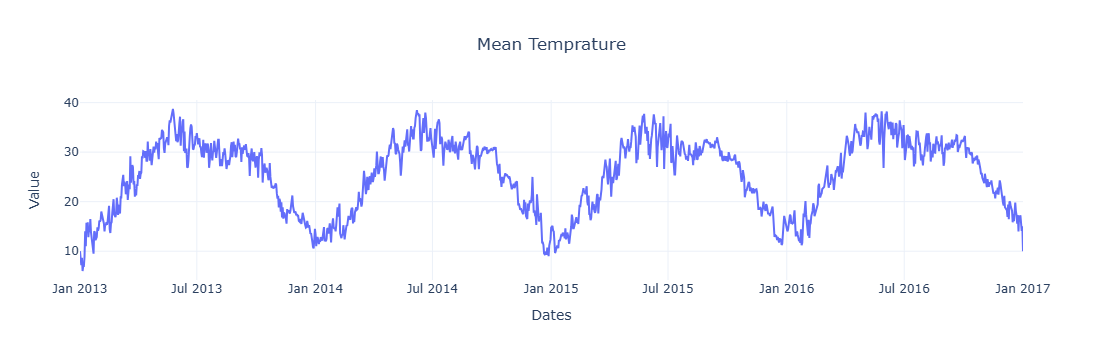

In [48]:
fig_temp=go.Figure()
fig_temp.add_trace(go.Scatter(x=data_train_date.index, y=data_train_date["meantemp"], mode="lines"))
fig_temp.update_layout(title="Mean Temprature", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5)
fig_temp.show()

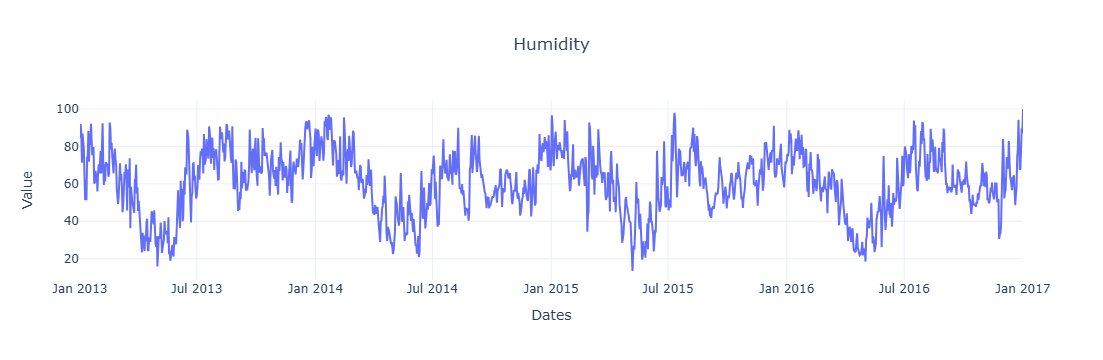

In [49]:
fig_temp=go.Figure()
fig_temp.add_trace(go.Scatter(x=data_train_date.index, y=data_train_date["humidity"], mode="lines"))
fig_temp.update_layout(title="Humidity", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5)
fig_temp.show()

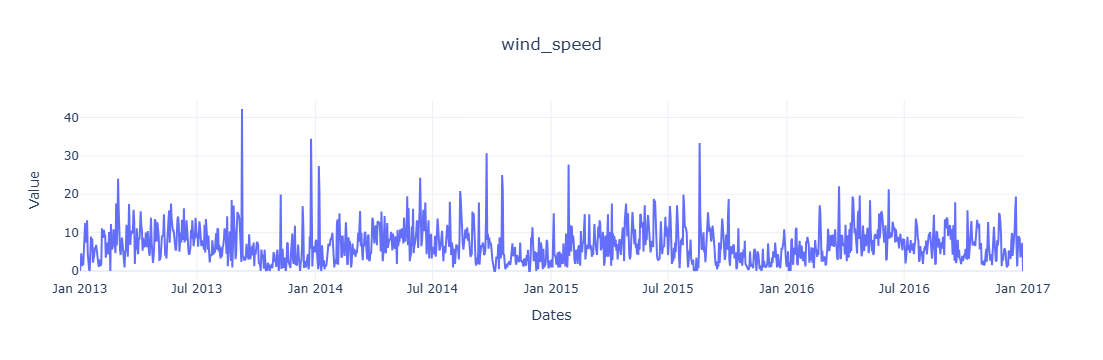

In [50]:
fig_temp=go.Figure()
fig_temp.add_trace(go.Scatter(x=data_train_date.index, y=data_train_date["wind_speed"], mode="lines"))
fig_temp.update_layout(title="wind_speed", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5)
fig_temp.show()

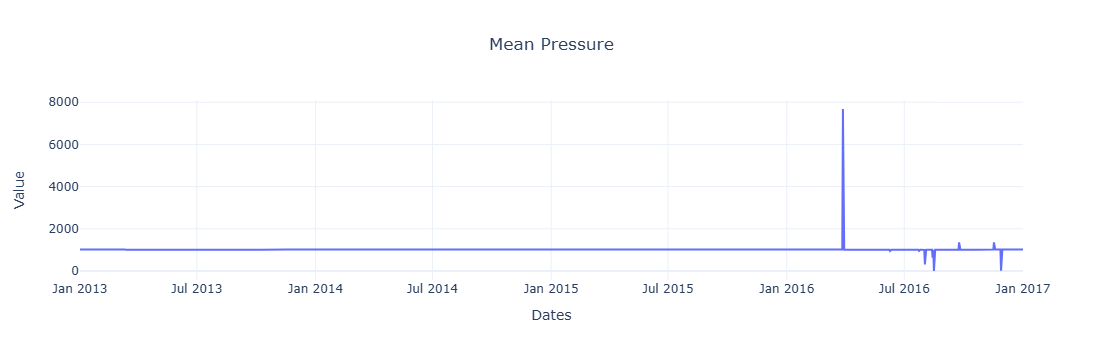

In [51]:
fig_temp=go.Figure()
fig_temp.add_trace(go.Scatter(x=data_train_date.index, y=data_train_date["meanpressure"], mode="lines"))
fig_temp.update_layout(title="Mean Pressure", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5)
fig_temp.show()

### 2013 Vs 2016

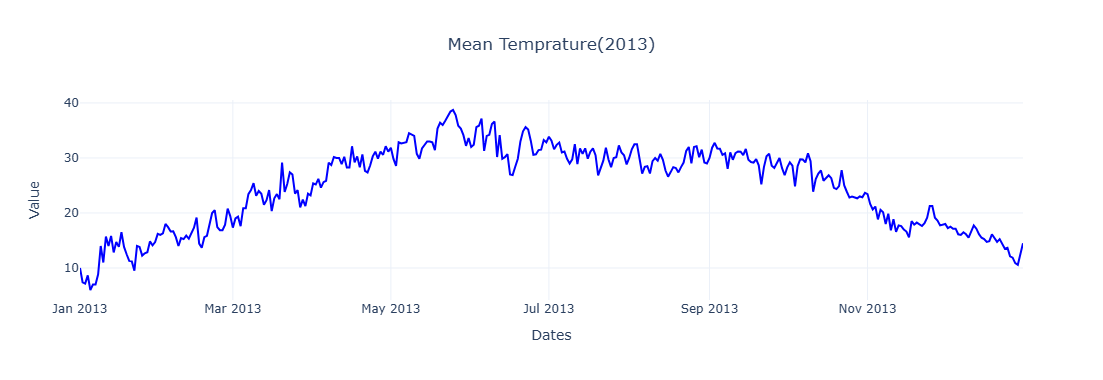

In [64]:
figure_temp_2013=go.Figure()
figure_temp_2013.add_trace(go.Scatter(x=data_train_date.loc["2013", :].index, y=data_train_date.loc["2013", "meantemp"], mode="lines", line=dict(color="blue")))
figure_temp_2013.update_layout(title="Mean Temprature(2013)", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5, height=380)
figure_temp_2013.show()

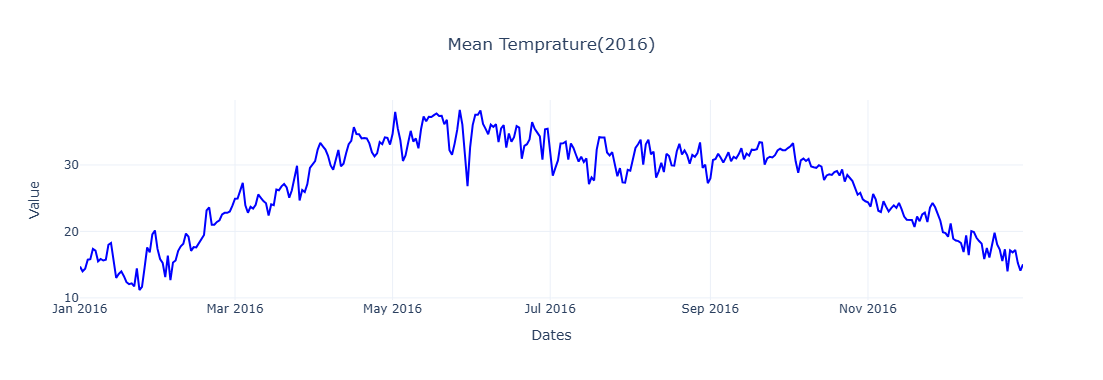

In [65]:
figure_temp_2016=go.Figure()
figure_temp_2016.add_trace(go.Scatter(x=data_train_date.loc["2016", :].index, y=data_train_date.loc["2016", "meantemp"], mode="lines", line=dict(color="blue")))
figure_temp_2016.update_layout(title="Mean Temprature(2016)", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5, height=380)
figure_temp_2016.show()

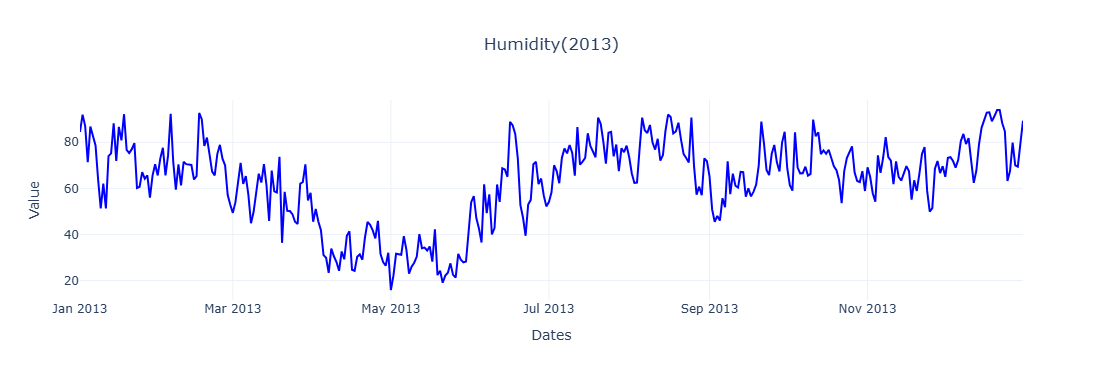

In [71]:
figure_humidity_2013=go.Figure()
figure_humidity_2013.add_trace(go.Scatter(x=data_train_date.loc["2013", :].index, y=data_train_date.loc["2013", "humidity"], mode="lines", line=dict(color="blue")))
figure_humidity_2013.update_layout(title="Humidity(2013)", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5, height=380)
figure_humidity_2013.show()

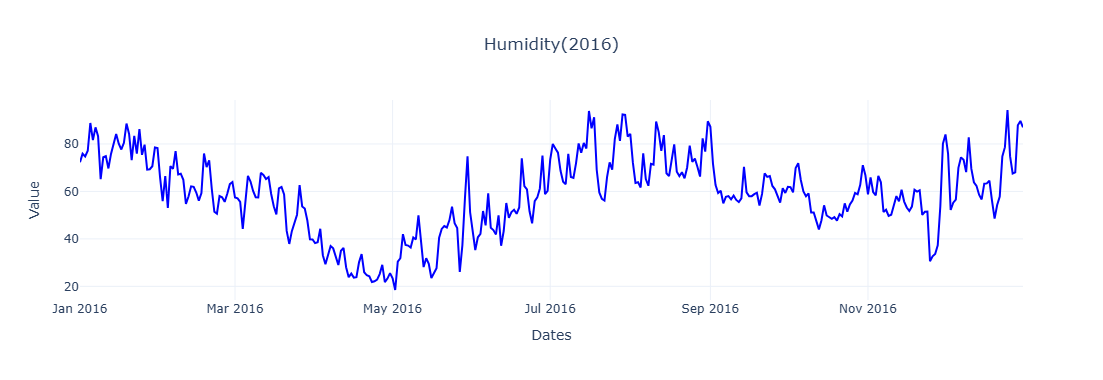

In [68]:
figure_humidity_2016=go.Figure()
figure_humidity_2016.add_trace(go.Scatter(x=data_train_date.loc["2016", :].index, y=data_train_date.loc["2016", "humidity"], mode="lines", line=dict(color="blue")))
figure_humidity_2016.update_layout(title="Humidity(2016)", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5, height=380)
figure_humidity_2016.show()

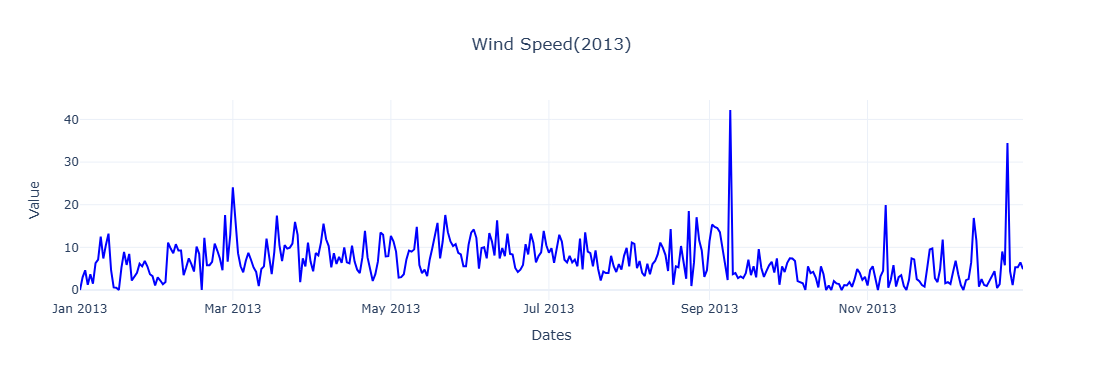

In [72]:
figure_wind_speed_2013=go.Figure()
figure_wind_speed_2013.add_trace(go.Scatter(x=data_train_date.loc["2013", :].index, y=data_train_date.loc["2013", "wind_speed"], mode="lines", line=dict(color="blue")))
figure_wind_speed_2013.update_layout(title="Wind Speed(2013)", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5, height=380)
figure_wind_speed_2013.show()

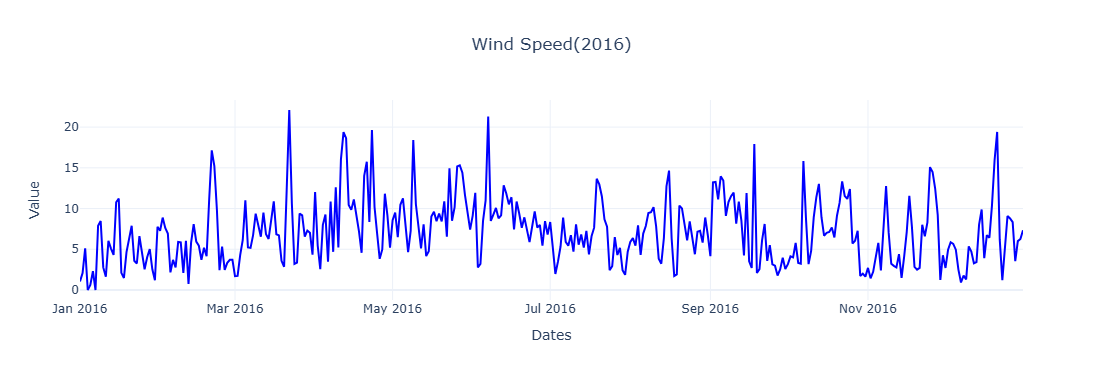

In [76]:
figure_wind_speed_2016=go.Figure()
figure_wind_speed_2016.add_trace(go.Scatter(x=data_train_date.loc["2016", :].index, y=data_train_date.loc["2016", "wind_speed"], mode="lines", line=dict(color="blue")))
figure_wind_speed_2016.update_layout(title="Wind Speed(2016)", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5, height=380)
figure_wind_speed_2016.show()

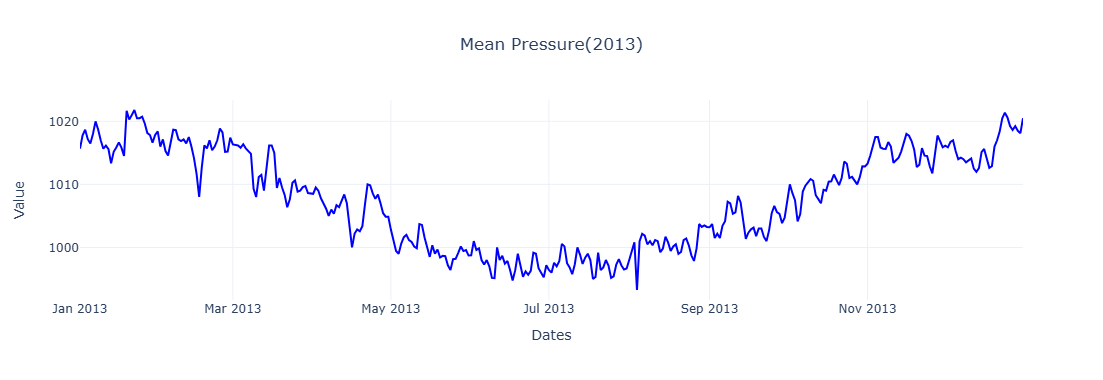

In [75]:
figure_meanpressure_2013=go.Figure()
figure_meanpressure_2013.add_trace(go.Scatter(x=data_train_date.loc["2013", :].index, y=data_train_date.loc["2013", "meanpressure"], mode="lines", line=dict(color="blue")))
figure_meanpressure_2013.update_layout(title="Mean Pressure(2013)", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5, height=380)
figure_meanpressure_2013.show()

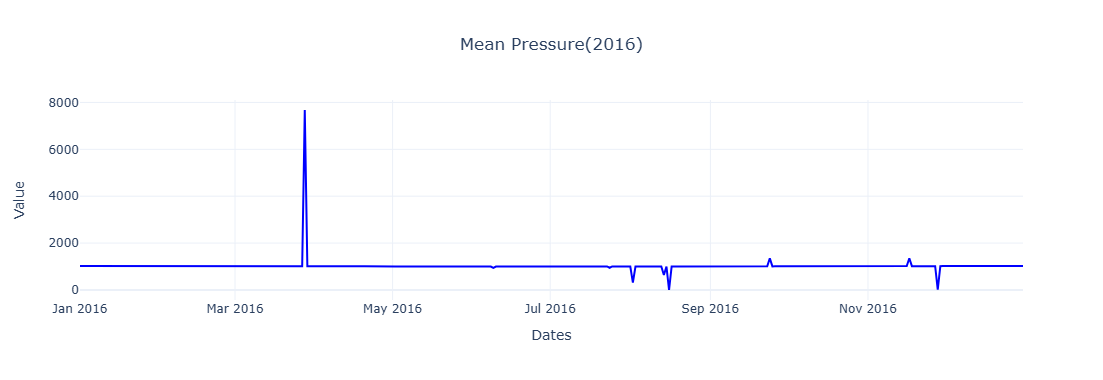

In [77]:
figure_meanpressure_2016=go.Figure()
figure_meanpressure_2016.add_trace(go.Scatter(x=data_train_date.loc["2016", :].index, y=data_train_date.loc["2016", "meanpressure"], mode="lines", line=dict(color="blue")))
figure_meanpressure_2016.update_layout(title="Mean Pressure(2016)", xaxis_title="Dates", yaxis_title="Value", template="plotly_white", title_x=0.5, height=380)
figure_meanpressure_2016.show()

## Preprocessing

In [55]:
data_train_date.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
year              int32
month             int32
day_name         object
dtype: object

### Dropping unnermical col

In [57]:
data_train_numerical=data_train_date.drop(columns=["day_name"])

In [58]:
data_train_numerical.head()

meantemp   humidity  wind_speed  meanpressure  year  month
date                                                                   
2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1

In [78]:
data_train_numerical.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month'], dtype='object')

In [59]:
data_test_numerical=data_test_date.drop(columns=["day_name"])

In [60]:
data_test_numerical.head()

meantemp   humidity  wind_speed  meanpressure  year  month
date                                                                   
2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1

In [80]:
data_test_numerical.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month'], dtype='object')

### Normalizing

In [84]:
scl= StandardScaler()
data_train_scl=scl.fit_transform(data_train_numerical)
data_test_scl=scl.fit_transform(data_test_numerical)

In [85]:
type(data_train_scl)

numpy.ndarray

### Convert noramlized data from numpy to dataframe

In [86]:
data_train_scl=pd.DataFrame(data_train_scl)
data_train_scl

0         1         2         3         4         5
0    -2.109500  1.415439 -1.491699  0.025321 -1.341891 -1.599501
1    -2.463454  1.862828 -0.838196  0.037162 -1.341891 -1.599501
2    -2.495219  1.564569 -0.475626  0.041972 -1.341891 -1.599501
3    -2.291015  0.630022 -1.221233  0.033647 -1.341891 -1.599501
4    -2.654044  1.554627 -0.680303  0.029946 -1.341891 -1.599501
...        ...       ...       ...       ...       ...       ...
1457 -1.126952  0.433776 -0.713674  0.024758  1.337005  1.588400
1458 -1.396406  1.615699 -0.175921  0.032193  1.337005  1.588400
1459 -1.551990  1.723641 -0.117442  0.037743  1.337005  1.588400
1460 -1.421654  1.564569  0.114646  0.027726  1.337005  1.588400
1461 -2.109500  2.340044 -1.491699  0.027171  2.229970 -1.599501

[1462 rows x 6 columns]

In [87]:
data_test_scl=pd.DataFrame(data_test_scl)
data_test_scl

0         1         2          3    4         5
0   -0.915971  1.559776 -1.511765 -10.608670  0.0 -1.292571
1   -0.507426  1.104275 -1.469505   0.159884  0.0 -1.292571
2   -0.726766  1.350093 -1.155357   0.160508  0.0 -1.292571
3   -0.475841  0.726477 -1.007459   0.130947  0.0 -1.292571
4   -0.524973  0.984293 -1.355976   0.115605  0.0 -1.292571
..        ...       ...       ...        ...  ...       ...
109  2.019376 -1.514852 -0.722627  -0.060732  0.0  1.436191
110  1.979895 -0.889334 -0.330720  -0.046700  0.0  1.436191
111  1.766696 -0.809005  0.208852  -0.027336  0.0  1.436191
112  1.762748 -1.514852  0.509080  -0.021442  0.0  1.436191
113  1.624563 -1.533665  1.123434   0.001210  0.0  1.436191

[114 rows x 6 columns]

### Rename cols

In [89]:
data_train_scl.rename(columns={0: "meantemp", 1:"humidity", 2:"windspeed", 3:"meanpressure", 4:"year", 5:"month"}, inplace=True)
data_train_scl.head()

meantemp  humidity  windspeed  meanpressure      year     month
0 -2.109500  1.415439  -1.491699      0.025321 -1.341891 -1.599501
1 -2.463454  1.862828  -0.838196      0.037162 -1.341891 -1.599501
2 -2.495219  1.564569  -0.475626      0.041972 -1.341891 -1.599501
3 -2.291015  0.630022  -1.221233      0.033647 -1.341891 -1.599501
4 -2.654044  1.554627  -0.680303      0.029946 -1.341891 -1.599501

In [90]:
data_test_scl.rename(columns={0: "meantemp", 1:"humidity", 2:"windspeed", 3:"meanpressure", 4:"year", 5:"month"}, inplace=True)
data_test_scl.head()

meantemp  humidity  windspeed  meanpressure  year     month
0 -0.915971  1.559776  -1.511765    -10.608670   0.0 -1.292571
1 -0.507426  1.104275  -1.469505      0.159884   0.0 -1.292571
2 -0.726766  1.350093  -1.155357      0.160508   0.0 -1.292571
3 -0.475841  0.726477  -1.007459      0.130947   0.0 -1.292571
4 -0.524973  0.984293  -1.355976      0.115605   0.0 -1.292571

Add date as a col to df then make it as index

In [97]:
data_date_train=pd.DataFrame({"date_train": date_train_date})
data_train_scl=pd.concat([data_train_scl,data_date_train], axis=1) 
data_train_scl.head()

meantemp  humidity  windspeed  meanpressure      year     month date_train
0 -2.109500  1.415439  -1.491699      0.025321 -1.341891 -1.599501 2013-01-01
1 -2.463454  1.862828  -0.838196      0.037162 -1.341891 -1.599501 2013-01-02
2 -2.495219  1.564569  -0.475626      0.041972 -1.341891 -1.599501 2013-01-03
3 -2.291015  0.630022  -1.221233      0.033647 -1.341891 -1.599501 2013-01-04
4 -2.654044  1.554627  -0.680303      0.029946 -1.341891 -1.599501 2013-01-05

In [98]:
data_train_scl.columns

Index(['meantemp', 'humidity', 'windspeed', 'meanpressure', 'year', 'month',
       'date_train'],
      dtype='object')

In [99]:
data_train_scl.set_index("date_train", inplace=True)
print(data_train_scl)

            meantemp  humidity  windspeed  meanpressure      year     month
date_train                                                                 
2013-01-01 -2.109500  1.415439  -1.491699      0.025321 -1.341891 -1.599501
2013-01-02 -2.463454  1.862828  -0.838196      0.037162 -1.341891 -1.599501
2013-01-03 -2.495219  1.564569  -0.475626      0.041972 -1.341891 -1.599501
2013-01-04 -2.291015  0.630022  -1.221233      0.033647 -1.341891 -1.599501
2013-01-05 -2.654044  1.554627  -0.680303      0.029946 -1.341891 -1.599501
...              ...       ...        ...           ...       ...       ...
2016-12-28 -1.126952  0.433776  -0.713674      0.024758  1.337005  1.588400
2016-12-29 -1.396406  1.615699  -0.175921      0.032193  1.337005  1.588400
2016-12-30 -1.551990  1.723641  -0.117442      0.037743  1.337005  1.588400
2016-12-31 -1.421654  1.564569   0.114646      0.027726  1.337005  1.588400
2017-01-01 -2.109500  2.340044  -1.491699      0.027171  2.229970 -1.599501

[1462 rows 

In [100]:
data_date_test=pd.DataFrame({"date_test": date_test_date})
data_test_scl=pd.concat([data_test_scl,data_date_test], axis=1) 
data_test_scl.head()

meantemp  humidity  windspeed  meanpressure  year     month  date_test
0 -0.915971  1.559776  -1.511765    -10.608670   0.0 -1.292571 2017-01-01
1 -0.507426  1.104275  -1.469505      0.159884   0.0 -1.292571 2017-01-02
2 -0.726766  1.350093  -1.155357      0.160508   0.0 -1.292571 2017-01-03
3 -0.475841  0.726477  -1.007459      0.130947   0.0 -1.292571 2017-01-04
4 -0.524973  0.984293  -1.355976      0.115605   0.0 -1.292571 2017-01-05

In [101]:
data_test_scl.columns

Index(['meantemp', 'humidity', 'windspeed', 'meanpressure', 'year', 'month',
       'date_test'],
      dtype='object')

## AutoReg Model (Predict wind speed)

### Extract the endogenous variable(wind speed)

In [104]:
wind_train=data_train_scl["windspeed"]
wind_train

date_train
2013-01-01   -1.491699
2013-01-02   -0.838196
2013-01-03   -0.475626
2013-01-04   -1.221233
2013-01-05   -0.680303
                ...   
2016-12-28   -0.713674
2016-12-29   -0.175921
2016-12-30   -0.117442
2016-12-31    0.114646
2017-01-01   -1.491699
Name: windspeed, Length: 1462, dtype: float64

In [105]:
wind_test=data_train_scl["windspeed"]
wind_test

date_train
2013-01-01   -1.491699
2013-01-02   -0.838196
2013-01-03   -0.475626
2013-01-04   -1.221233
2013-01-05   -0.680303
                ...   
2016-12-28   -0.713674
2016-12-29   -0.175921
2016-12-30   -0.117442
2016-12-31    0.114646
2017-01-01   -1.491699
Name: windspeed, Length: 1462, dtype: float64

### Train the AR model

In [109]:
lag_order=180
ar_model_wind=AutoReg(wind_train, lags=lag_order)
model_fit=ar_model_wind.fit()

C:\Users\Sravan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



### Make predictions

In [111]:
predictions=model_fit.predict(start=len(wind_train), end=len(wind_train)+len(wind_test)-1, dynamic=False)

C:\Users\Sravan\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



### Evaluate the model

In [115]:
mse_wind=mean_squared_error(wind_train, predictions)
print(f'Mean Squared Error:{mse_wind:5f}')

Mean Squared Error:0.971602


In [118]:
mae_wind=mean_absolute_error(wind_train, predictions)
print(f'Mean Absolute Error:{mae_wind:5f}')

Mean Absolute Error:0.742569


In [121]:
rsme_wind=mean_squared_error(wind_train, predictions, squared=False)
print(f'Root Mean Squared Error:{rsme_wind:5f}')

Root Mean Squared Error:0.985699


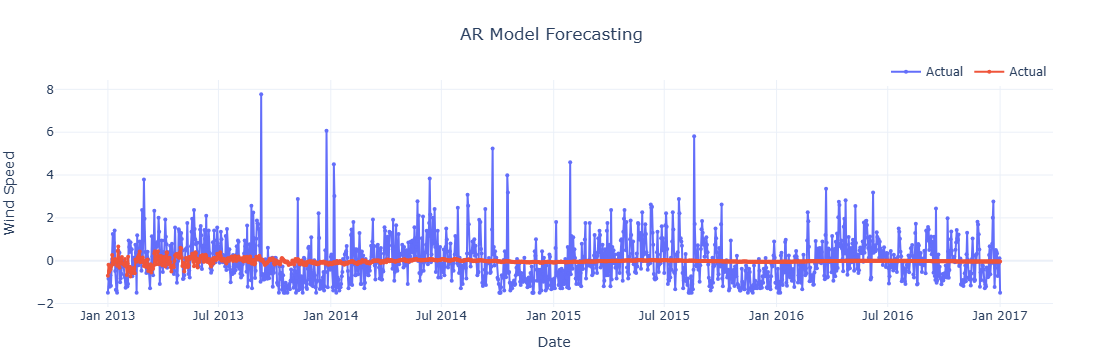

In [125]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=wind_test.index, y=wind_test, mode="lines+markers", name="Actual"))
fig.add_trace(go.Scatter(x=wind_test.index, y=predictions, mode="lines+markers", name="Actual"))
fig.update_layout(title ="AR Model Forecasting", xaxis_title="Date", yaxis_title="Wind Speed", legend=dict(orientation="h", yanchor="top", y=1.1, 
                                                                                               xanchor="right", x=1), 
                  margin=dict(l=50, r=50, t=80, b=50),
                  template="plotly_white", title_x=0.5)
fig.update_traces(marker=dict(size=4))
fig.show()

In [126]:
print(wind_test)

date_train
2013-01-01   -1.491699
2013-01-02   -0.838196
2013-01-03   -0.475626
2013-01-04   -1.221233
2013-01-05   -0.680303
                ...   
2016-12-28   -0.713674
2016-12-29   -0.175921
2016-12-30   -0.117442
2016-12-31    0.114646
2017-01-01   -1.491699
Name: windspeed, Length: 1462, dtype: float64


In [127]:
print(predictions)

2017-01-02   -0.701832
2017-01-03   -0.189319
2017-01-04   -0.523228
2017-01-05   -0.448629
2017-01-06   -0.408211
                ...   
2020-12-29   -0.036227
2020-12-30   -0.036647
2020-12-31   -0.036469
2021-01-01   -0.036263
2021-01-02   -0.036244
Freq: D, Length: 1462, dtype: float64
